In [ ]:
df.to_csv('task_scheduling1.csv', index=False)


In [ ]:
# Re-reading and combining the real data files into one DataFrame

# File paths for the real data
real_data_file_paths = [
    "/content/drive/MyDrive/IEEE Access dataset/Cloudlets/D_c-hilo.txt",
    "/content/drive/MyDrive/IEEE Access dataset/Cloudlets/D_c-lohi.txt",
    "/content/drive/MyDrive/IEEE Access dataset/Cloudlets/D_i-hilo.txt",
    "/content/drive/MyDrive/IEEE Access dataset/Cloudlets/D_i-lohi.txt",
    "/content/drive/MyDrive/IEEE Access dataset/VMs/VM_c-hilo.txt",
    "/content/drive/MyDrive/IEEE Access dataset/VMs/VM_c-lohi.txt",
    "/content/drive/MyDrive/IEEE Access dataset/VMs/VM_i-hilo.txt",
    "/content/drive/MyDrive/IEEE Access dataset/VMs/VM_i-lohi.txt"
]

# Instance types corresponding to each file pair
instance_types = ['c-hilo', 'c-lohi', 'i-hilo', 'i-lohi']

# Reading the real data files and creating a single DataFrame
real_data_dfs = []
for i in range(0, len(real_data_file_paths), 2):
    # Reading cloudlet data (D_*) and VM data (VM_*) for each instance type
    cloudlet_df = pd.read_csv(real_data_file_paths[i], header=None, names=['Cloudlet_Size_MIs'])
    vm_df = pd.read_csv(real_data_file_paths[i + 1], header=None, names=['VM_MIPS'])

    # Creating a combined DataFrame for each instance type
    combined_df = pd.concat([cloudlet_df, vm_df], axis=1)
    combined_df['Instance'] = instance_types[i // 2]

    real_data_dfs.append(combined_df)

# Concatenating all instance type DataFrames into one
final_real_data_df = pd.concat(real_data_dfs, ignore_index=True)

# Adding additional attributes (similar to previous approach)
final_real_data_df['Cloudlet_ID'] = np.arange(1, len(final_real_data_df) + 1)
final_real_data_df['VM_ID'] = ['VM_' + str(random.randint(1, 500)) for _ in range(len(final_real_data_df))]
final_real_data_df['VM_Load'] = np.random.uniform(0.01, 1.0, len(final_real_data_df))
final_real_data_df['VM_Capacity'] = np.random.randint(80, 85600, len(final_real_data_df))
final_real_data_df['Network_Bandwidth'] = np.random.randint(22, 257, len(final_real_data_df))
final_real_data_df['Estimated_Completion_Time'] = np.random.uniform(80, 1123, len(final_real_data_df))

# Shuffle the DataFrame
final_real_data_df = final_real_data_df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the final real data DataFrame
final_real_data_df.head(), final_real_data_df.describe()


(   Cloudlet_Size_MIs  VM_MIPS Instance  Cloudlet_ID   VM_ID   VM_Load  \
 0            1551917     2971   c-lohi         1924  VM_499  0.261082   
 1          823092240    21210   c-hilo           37  VM_232  0.393468   
 2           85823437      346   c-hilo           67  VM_355  0.730451   
 3             187105       48   c-lohi         1631  VM_147  0.142494   
 4              11486       17   c-lohi         1178  VM_364  0.524857   
 
    VM_Capacity  Network_Bandwidth  Estimated_Completion_Time  
 0        58317                221                  95.610099  
 1        11172                211                 575.360295  
 2        37409                234                 904.888668  
 3         8879                202                 332.458138  
 4        64921                112                 628.113082  ,
        Cloudlet_Size_MIs       VM_MIPS  Cloudlet_ID      VM_Load  \
 count       2.112000e+03   2112.000000  2112.000000  2112.000000   
 mean        3.829231e+08   102

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#Relevant Libraries Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
df1 = pd.read_csv('/content/task_scheduling1.csv')

In [ ]:
df1.head()

,Cloudlet_Size_MIs,VM_MIPS,Instance,Cloudlet_ID,VM_ID,VM_Load,VM_Capacity,Network_Bandwidth,Completion_Time
0,1099487911,20,c-hilo,372,VM_162,0.652489,10332,165,154.832745
1,53650661,486,c-hilo,912,VM_308,0.186424,21050,31,1011.144185
2,2308734,188,c-hilo,151,VM_304,0.530261,83111,193,1007.416038
3,528004,53,c-lohi,1580,VM_373,0.367744,73468,89,906.934506
4,106638,61,c-lohi,1254,VM_379,0.666115,12530,162,789.969271


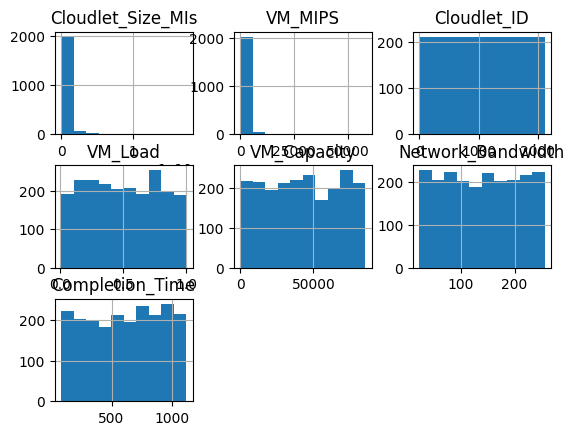

<Figure size 1600x1600 with 0 Axes>

In [ ]:

df1.hist()
plt.figure(figsize=(16,16))

plt.show()


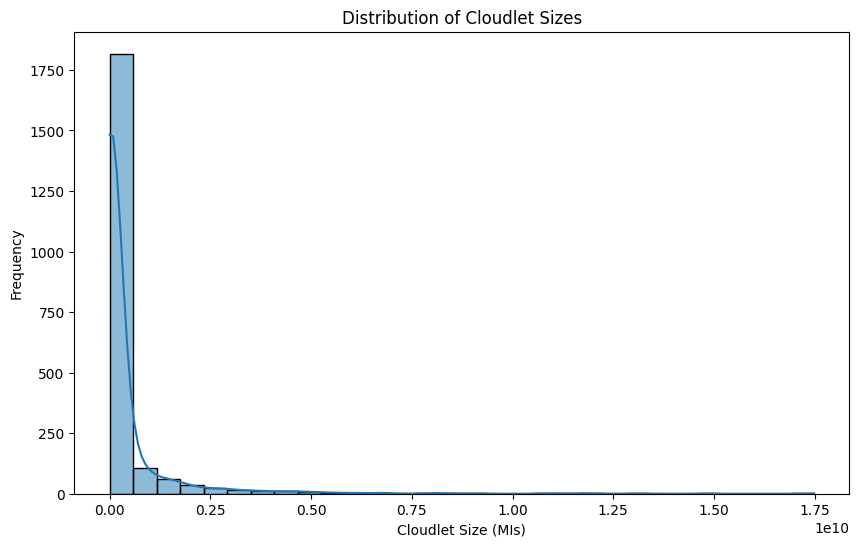

In [ ]:
# prompt: increase size  df.hist() plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of Cloudlet Size
plt.figure(figsize=(10, 6))
sns.histplot(df1['Cloudlet_Size_MIs'], bins=30, kde=True)
plt.title('Distribution of Cloudlet Sizes')
plt.xlabel('Cloudlet Size (MIs)')
plt.ylabel('Frequency')
plt.show()


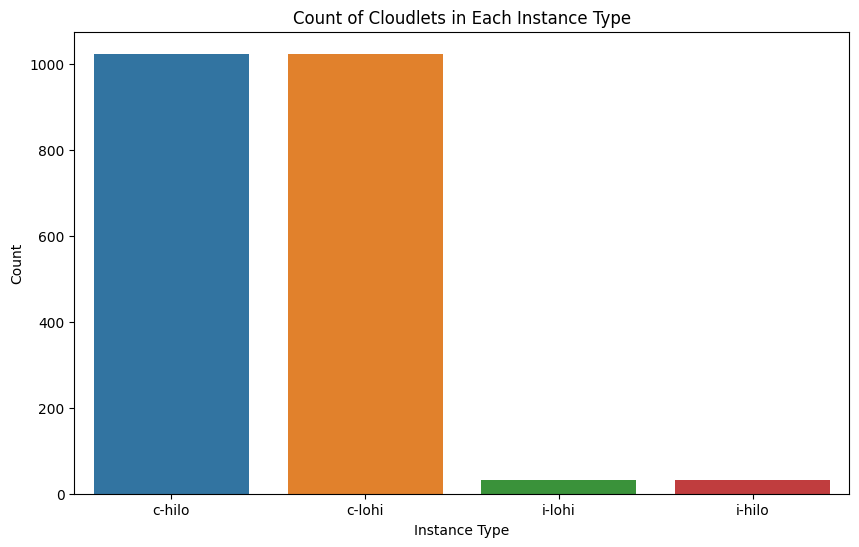

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Instance', data=df1)
plt.title('Count of Cloudlets in Each Instance Type')
plt.xlabel('Instance Type')
plt.ylabel('Count')
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


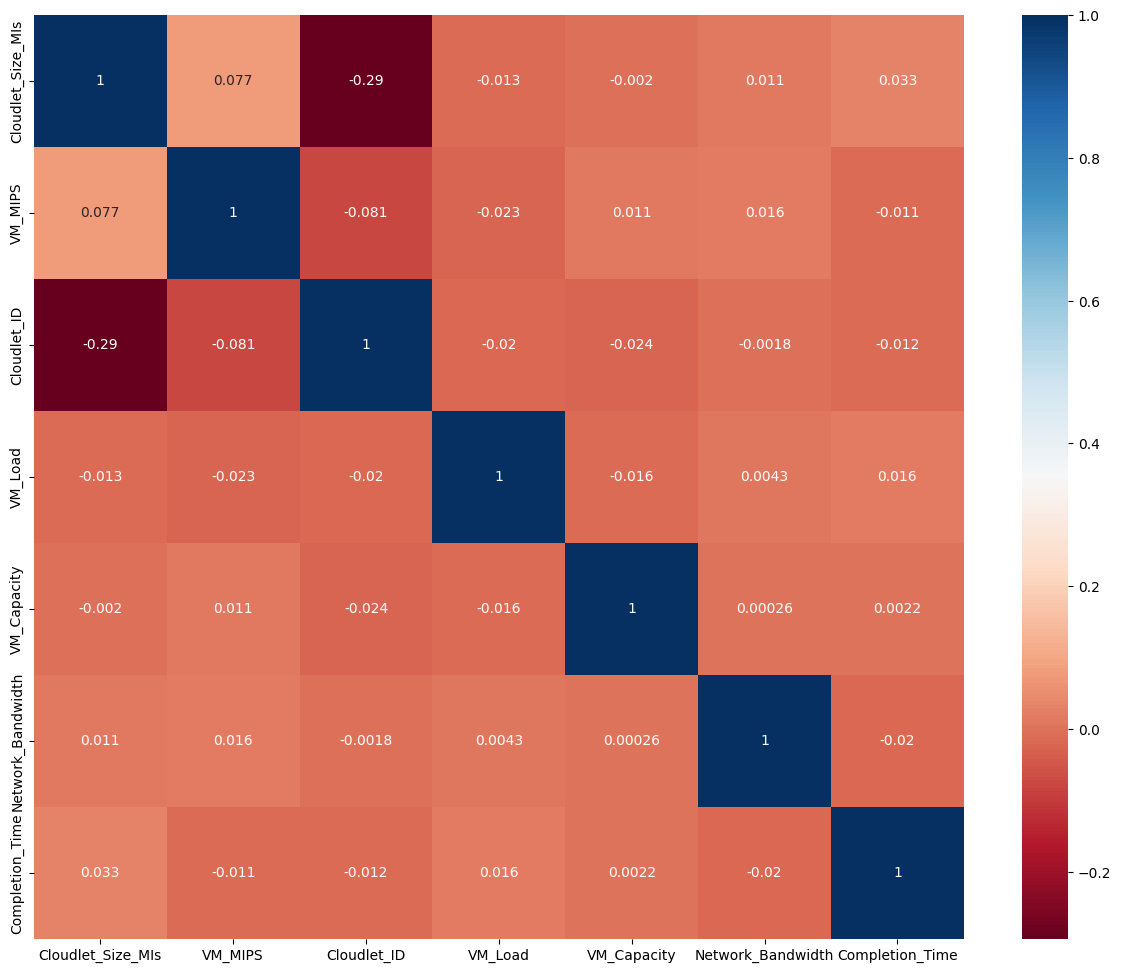

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(), annot=True,cmap='RdBu')
plt.show()

In [ ]:
print(f"There are {df1.duplicated().sum()} duplicates data")


There are 0 duplicates data


In [ ]:
df1.isnull().sum()


Cloudlet_Size_MIs    0
VM_MIPS              0
Instance             0
Cloudlet_ID          0
VM_ID                0
VM_Load              0
VM_Capacity          0
Network_Bandwidth    0
Completion_Time      0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cloudlet_Size_MIs  2112 non-null   int64  
 1   VM_MIPS            2112 non-null   int64  
 2   Instance           2112 non-null   object 
 3   Cloudlet_ID        2112 non-null   int64  
 4   VM_ID              2112 non-null   object 
 5   VM_Load            2112 non-null   float64
 6   VM_Capacity        2112 non-null   int64  
 7   Network_Bandwidth  2112 non-null   int64  
 8   Completion_Time    2112 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 148.6+ KB


In [ ]:
df1["Instance"].value_counts()

c-hilo    1024
c-lohi    1024
i-lohi      32
i-hilo      32
Name: Instance, dtype: int64

In [ ]:
df1.head()

,Cloudlet_Size_MIs,VM_MIPS,Instance,Cloudlet_ID,VM_ID,VM_Load,VM_Capacity,Network_Bandwidth,Completion_Time
0,1099487911,20,c-hilo,372,VM_162,0.652489,10332,165,154.832745
1,53650661,486,c-hilo,912,VM_308,0.186424,21050,31,1011.144185
2,2308734,188,c-hilo,151,VM_304,0.530261,83111,193,1007.416038
3,528004,53,c-lohi,1580,VM_373,0.367744,73468,89,906.934506
4,106638,61,c-lohi,1254,VM_379,0.666115,12530,162,789.969271


In [ ]:
# prompt: do label encoding

df1['VM_ID'] = le.fit_transform(df['VM_ID'])
df1['Instance'] = le.fit_transform(df['Instance'])



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cloudlet_Size_MIs  2112 non-null   int64  
 1   VM_MIPS            2112 non-null   int64  
 2   Instance           2112 non-null   int64  
 3   Cloudlet_ID        2112 non-null   int64  
 4   VM_ID              2112 non-null   int64  
 5   VM_Load            2112 non-null   float64
 6   VM_Capacity        2112 non-null   int64  
 7   Network_Bandwidth  2112 non-null   int64  
 8   Completion_Time    2112 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 148.6 KB


In [ ]:
# prompt: do standard scaling

scaler = StandardScaler()
df1[['Cloudlet_Size_MIs', 'VM_MIPS', 'VM_Load', 'VM_Capacity', 'Network_Bandwidth', 'Completion_Time']] = scaler.fit_transform(df1[['Cloudlet_Size_MIs', 'VM_MIPS', 'VM_Load', 'VM_Capacity', 'Network_Bandwidth', 'Completion_Time']])


In [ ]:
df1.head()

,Cloudlet_Size_MIs,VM_MIPS,Instance,Cloudlet_ID,VM_ID,VM_Load,VM_Capacity,Network_Bandwidth,Completion_Time
0,0.587620,-0.313207,0,372,70,0.534385,-1.321527,0.381501,-1.496003
1,-0.270020,-0.167686,0,912,228,-1.122264,-0.888369,-1.578878,1.310946
2,-0.312123,-0.260744,0,151,224,0.099919,1.619766,0.791132,1.298726
3,-0.313584,-0.302902,1,1580,300,-0.477754,1.230054,-0.730356,0.969352
4,-0.313929,-0.300403,1,1254,306,0.582820,-1.232697,0.337612,0.585945


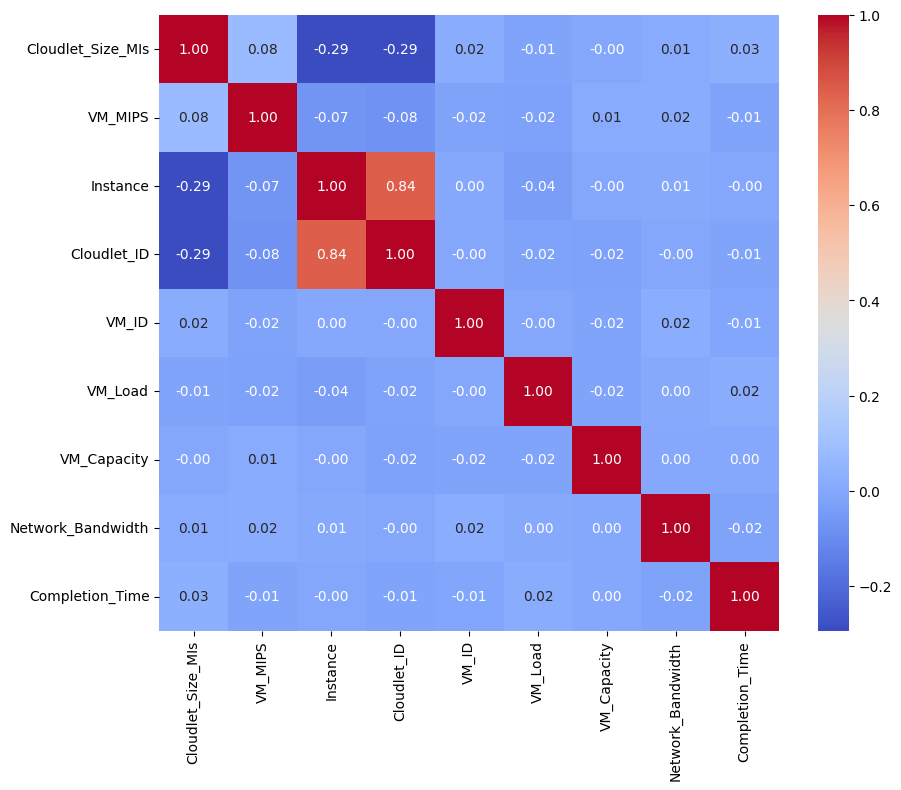

In [ ]:
# prompt: show heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [ ]:
df1.head()

,Cloudlet_Size_MIs,VM_MIPS,Instance,Cloudlet_ID,VM_ID,VM_Load,VM_Capacity,Network_Bandwidth,Completion_Time
0,0.587620,-0.313207,0,372,70,0.534385,-1.321527,0.381501,-1.496003
1,-0.270020,-0.167686,0,912,228,-1.122264,-0.888369,-1.578878,1.310946
2,-0.312123,-0.260744,0,151,224,0.099919,1.619766,0.791132,1.298726
3,-0.313584,-0.302902,1,1580,300,-0.477754,1.230054,-0.730356,0.969352
4,-0.313929,-0.300403,1,1254,306,0.582820,-1.232697,0.337612,0.585945


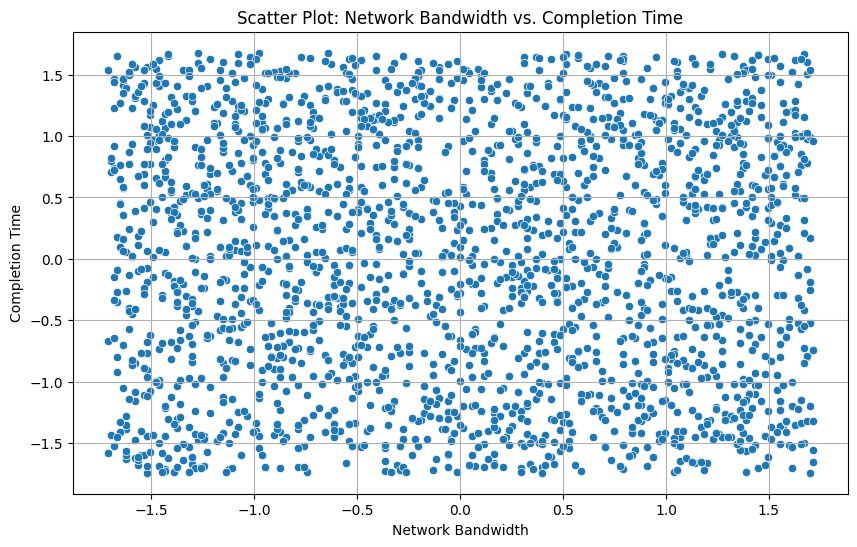

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Network_Bandwidth', y='Completion_Time', data=df1)
plt.title('Scatter Plot: Network Bandwidth vs. Completion Time')
plt.xlabel('Network Bandwidth')
plt.ylabel('Completion Time')
plt.grid(True)
plt.show()

In [ ]:
# prompt: define x and y

X = df1.drop(['Completion_Time'], axis=1)
y = df1['Completion_Time']


In [ ]:
y

0      -1.496003
1       1.310946
2       1.298726
3       0.969352
4       0.585945
          ...   
2107   -1.698319
2108    0.557733
2109    0.683669
2110    0.962941
2111    1.058815
Name: Completion_Time, Length: 2112, dtype: float64

In [ ]:

# Ensure target variable is non-negative
y = y.abs()  # You can use this to take the absolute value of y

In [ ]:
y

0       1.496003
1       1.310946
2       1.298726
3       0.969352
4       0.585945
          ...   
2107    1.698319
2108    0.557733
2109    0.683669
2110    0.962941
2111    1.058815
Name: Completion_Time, Length: 2112, dtype: float64

In [ ]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:





# Use DecisionTreeRegressor for regression
from sklearn.tree import DecisionTreeRegressor
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)
predictions = DT1.predict(X_test)

# Import necessary metrics for regression evaluation
from sklearn import metrics

# Print regression metrics
print("mse=", metrics.mean_squared_error(y_test, predictions))
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
print("mae=", metrics.mean_absolute_error(y_test, predictions))
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


mse= 0.490314632811656
msle= 0.15758404560405687
mae= 0.5774677326958702
rmse= 0.7002247016577293


In [ ]:
# prompt: create model for xgb

xgb1 = xgboost.XGBRegressor()
xgb1.fit(X_train, y_train)
predictions = xgb1.predict(X_test)
# print classification report
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


mse= 0.28891944087939836
msle= 0.091965148782011
mae= 0.4519548586513388
rmse= 0.5375122704454275


In [ ]:
# prompt: do for random forest

from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=100)
rf1.fit(X_train, y_train)
predictions = rf1.predict(X_test)
# print classification report
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))



mse= 0.24421388378676245
msle= 0.07913641081034804
mae= 0.4211684112551702
rmse= 0.4941800115208652


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score



# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Support Vector Machine (SVM) Regressor
svm = SVR()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Gaussian Naive Bayes is not typically used for regression tasks
# I'm including it here for completeness, but it's not a suitable choice for regression.
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# gnb_predictions = gnb.predict(X_test)

# Neural Network Regressor
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
nn.fit(X_train, y_train)
nn_predictions = nn.predict(X_test)

# Evaluate the models
def evaluate_model(name, predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    msle = mean_squared_log_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"{name} Metrics:")
    print(f"MSE: {mse}")
    print(f"MSLE: {msle}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print("")

evaluate_model("Linear Regression", lr_predictions, y_test)
evaluate_model("Decision Tree", dt_predictions, y_test)
evaluate_model("SVM", svm_predictions, y_test)
# Gaussian Naive Bayes is not suitable for regression, so we omit its evaluation.
# evaluate_model("Gaussian Naive Bayes", gnb_predictions, y_test)
evaluate_model("Neural Network", nn_predictions, y_test)


Linear Regression Metrics:
MSE: 0.23714648935983992
MSLE: 0.07744396937273654
MAE: 0.4187182905785555
RMSE: 0.48697688791136684

Decision Tree Metrics:
MSE: 0.4816026073305464
MSLE: 0.1541434369463805
MAE: 0.5676105200649502
RMSE: 0.6939759414637847

SVM Metrics:
MSE: 0.23566012437178244
MSLE: 0.07709406020593265
MAE: 0.4181619487056339
RMSE: 0.4854483745691013

Neural Network Metrics:
MSE: 0.29730320149002165
MSLE: 0.09561357801038849
MAE: 0.4540795859050876
RMSE: 0.5452551709887965



In [ ]:
pip install eli5


In [ ]:
import eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance


# Explain the model using permutation importance
perm = PermutationImportance(rf1, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.0189 ± 0.0269,VM_MIPS
0.0163 ± 0.0183,VM_Capacity
0.0133 ± 0.0235,VM_ID
0.0083 ± 0.0177,Cloudlet_ID
0.0066 ± 0.0187,Network_Bandwidth
0.0008 ± 0.0012,Instance
-0.0020 ± 0.0232,VM_Load
-0.0207 ± 0.0161,Cloudlet_Size_MIs


In [ ]:
pip install shap

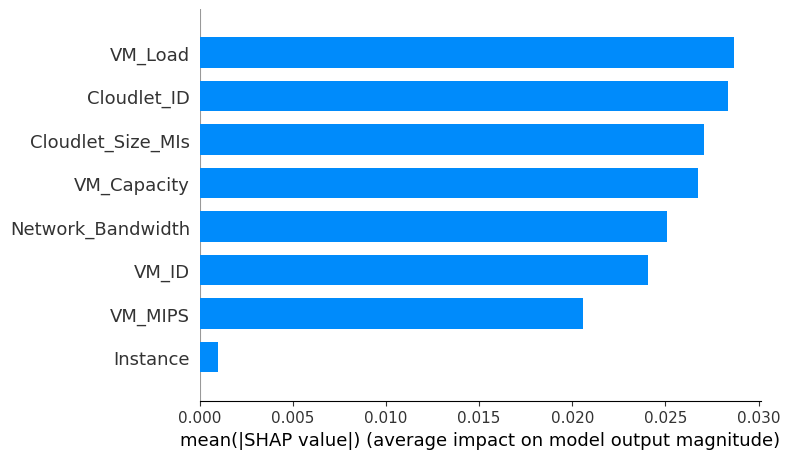

In [ ]:
import shap

explainer = shap.Explainer(rf1)
shap_values = explainer(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
